In [1]:
import sys
sys.path.append('..')
import time
from astropy.table import Table
import pyfits as fits
import numpy as np
import matplotlib.pyplot as plt
from os.path import expanduser
from deeplens.resnet_classifier import deeplens_classifier
from deeplens.utils.blfchallenge import classify_ground_challenge 

from sklearn import metrics

home = expanduser("~")

Using Theano backend.


In [2]:
imgs = 240

download_path='//Volumes/CJSTORFER/' # To be adjusted on your machine

export_path=home+'/Desktop/'   # To be adjusted on your machine

d = Table.read(export_path+'catalogs_'+str(imgs)+'_RGB.hdf5', path='/ground')  

x = np.asarray(d['image']).reshape((-1,3,101,101))

y = np.asarray(d['is_lens']).reshape((-1,1))

max: 100.0
min: -1.05758395097e-10
mean: 0.815810541453
std: 8.99530473667


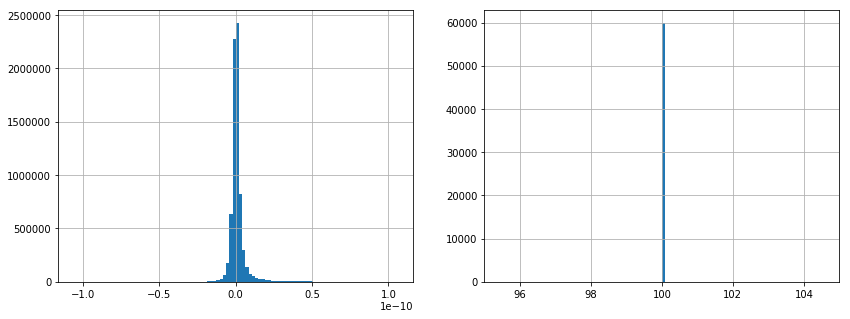

In [3]:
std = np.std(x)
print 'max:',np.max(x)
print 'min:',np.min(x)
print 'mean:',np.mean(x)
print 'std:', np.std(x)
plt.figure(figsize= (14,5))
plt.subplot(121)
plt.hist(x.reshape(7344720), bins = 100,alpha = 1, range = (x.min(),-x.min()))
plt.grid(True)
plt.subplot(122)
plt.hist(x.reshape(7344720), bins = 100,alpha = 1, range = (95,105))
plt.grid(True)
plt.xlim([95,105])
plt.show()

In [4]:
ims = np.zeros((61, 3, 101, 101))
counter = 0
 
files = 61

for i in range (files):
    ims[i] = fits.getdata('/Users/Chris/Desktop/Training_Set/Lenses/cutout_{}.fits'.format(i))

x_lens_32 = ims
y_lens_32 = np.ones((61,1))

files = 168

ims_0 = np.zeros((files, 3, 101, 101))
counter = 0
 

for i in range (files):
    ims_0[i] = fits.getdata('/Users/Chris/Desktop/Training_Set/Non-Lenses/cutout_000{:03d}.fits'.format(i))
x_nonlens = ims_0
y_nonlens = np.zeros((x_nonlens.shape[0],1))

x_test = np.concatenate((x_lens_32,x_nonlens))

y_test = np.concatenate((y_lens_32,y_nonlens))

max test: 102.838691711
min test: -0.0957373976707
mean test: 0.0162182525874
std test: 0.376689987436


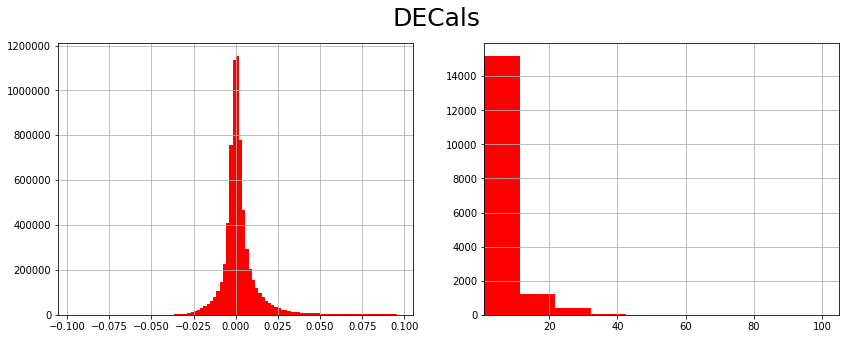

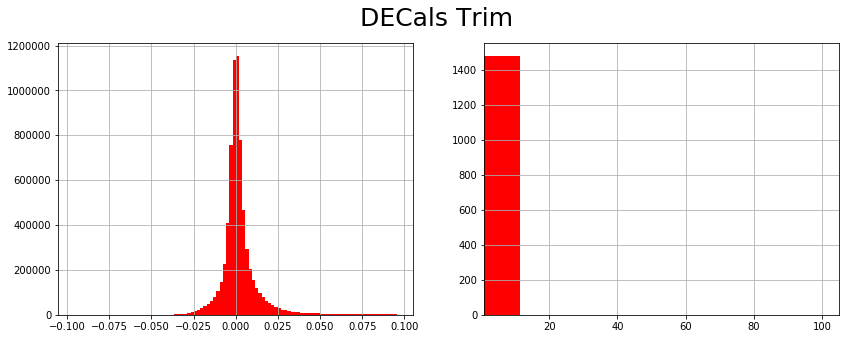


max test trim: 1.13002645969
min test trim: -0.0957373976707
mean test trim: 0.00558800022289
std test trim: 0.0408960867135


In [5]:
std_test = np.std(x_test)
print 'max test:',np.max(x_test)
print 'min test:',np.min(x_test)
print 'mean test:',np.mean(x_test)
print 'std test:', x_test.std()
# idx = (x_test>x_test.min())*(x_test<-x_test.min())
idx = (x_test>-std_test*3)*(x_test<std_test*3)

x_test_trim = x_test[idx]
plt.figure(figsize= (14,5))
plt.subplot(121)
plt.hist(x_test.reshape(7008087,), bins = 100, color = 'red', range = (x_test.min(),-x_test.min()))
plt.grid(True)
# plt.xlim([-std_test*4,std_test*4])
# plt.xlim([0,105])
# plt.ylim([0,5])
plt.subplot(122)
plt.hist(x_test.reshape(7008087,), bins = 10,alpha = 1, range = (1,105), color = 'red')
plt.grid(True)
plt.xlim([1,105])
plt.suptitle('DECals', fontsize = 25)





plt.figure(figsize= (14,5))
plt.subplot(121)
plt.hist(x_test_trim.ravel(), bins = 100, color = 'red', range = (x_test_trim.min(),-x_test_trim.min()))
plt.grid(True)
# plt.xlim([-std_test*4,std_test*4])
# plt.ylim([0,5])
plt.subplot(122)
plt.hist(x_test_trim.ravel(), bins = 10,alpha = 1, range = (1,105), color = 'red')
plt.grid(True)
plt.xlim([1,105])
plt.suptitle('DECals Trim', fontsize = 25)
plt.show()

print '\nmax test trim:',np.max(x_test_trim)
print 'min test trim:',np.min(x_test_trim)
print 'mean test trim:',np.mean(x_test_trim)
print 'std test trim:', x_test_trim.std()

In [6]:
print 'max test:',np.max(x_test)
print 'max:',np.max(x)

print '\nmin test:',np.min(x_test)
print 'min:',np.min(x)

print '\nmean test:',np.mean(x_test)
print 'mean:',np.mean(x)

max test: 102.838691711
max: 100.0

min test: -0.0957373976707
min: -1.05758395097e-10

mean test: 0.0162182525874
mean: 0.815810541453


In [7]:
#Mask images to remove the pix w/values 100+

mask = np.where(x >= 100)

x[mask] = 0

max: 3.67043746508e-08
min: -1.05758395097e-10
mean: 2.62198243202e-12
std: 6.81520765561e-11


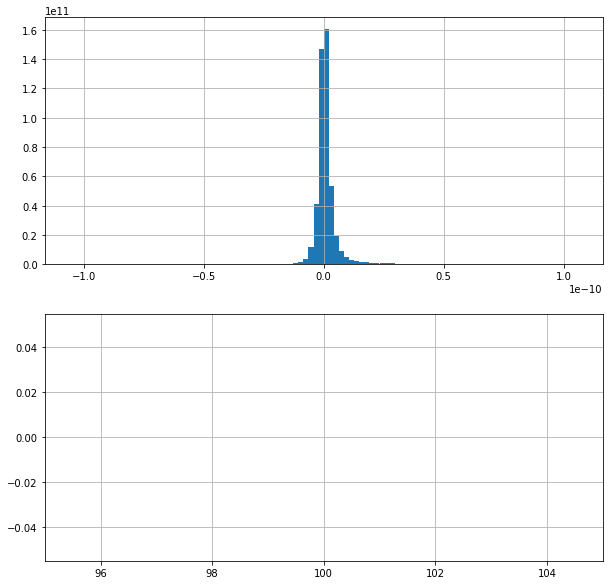

In [8]:
std = np.std(x)
print 'max:',np.max(x)
print 'min:',np.min(x)
print 'mean:',np.mean(x)
print 'std:', np.std(x)
plt.figure(figsize= (10,10))
plt.subplot(211)
plt.hist(x.reshape(7344720), bins = 100,alpha = 1, density = True, range = (x.min(),-x.min()))
# plt.xlim([-std*5,std*5])
plt.grid(True)
plt.subplot(212)
plt.hist(x.reshape(7344720), bins = 100,alpha = 1, density = True, range = (95,105))
plt.grid(True)
plt.xlim([95,105])
plt.show()

# PRE-PROCESSING FOR TRAINING SET (X):

In [9]:
vmin=-1e-9
vmax=1e-9
scale=100

x = np.clip(x, vmin, vmax)

max: 1e-09
min: -1.05758395097e-10
mean: 2.3012201072e-12
std: 2.28338524525e-11


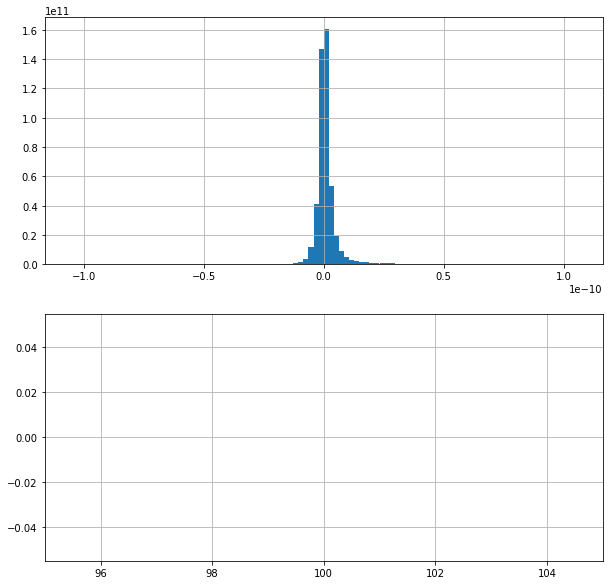

In [10]:
std = np.std(x)
print 'max:',np.max(x)
print 'min:',np.min(x)
print 'mean:',np.mean(x)
print 'std:', np.std(x)
plt.figure(figsize= (10,10))
plt.subplot(211)
plt.hist(x.reshape(7344720), bins = 100,alpha = 1, density = True, range = (x.min(),-x.min()))
# plt.xlim([-std*5,std*5])
plt.grid(True)
plt.subplot(212)
plt.hist(x.reshape(7344720), bins = 100,alpha = 1, density = True, range = (95,105))
plt.grid(True)
plt.xlim([95,105])
plt.show()

In [11]:
x /= vmax 

In [12]:
import copy
x_test_orig = copy.copy(x_test)

max: 1.0
min: -0.105758395097
mean: 0.0023012201072
std: 0.0228338524525
trimmed sigma:  0.00703088765745
trimmed sigma test:  0.0408960867135


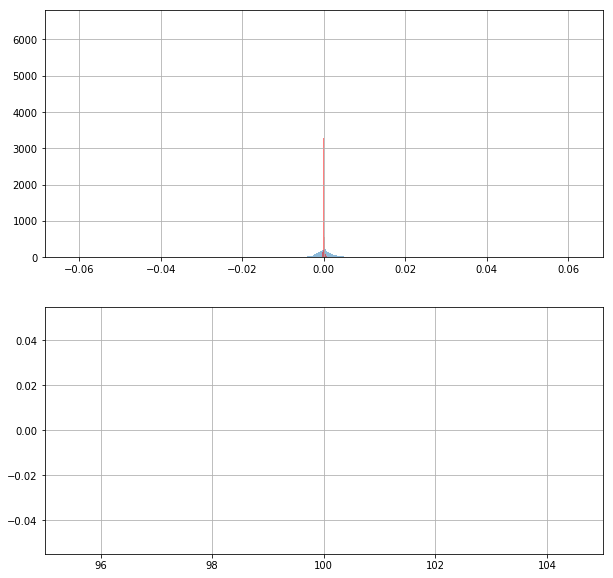

In [13]:

std = np.std(x)
print 'max:',np.max(x)
print 'min:',np.min(x)
print 'mean:',np.mean(x)
print 'std:', np.std(x)
idx = (x>x.min())*(x<-x.min())
sig_train_trim = x[idx].std()
sig_test_trim = x_test_trim.std()
print 'trimmed sigma: ', sig_train_trim
print 'trimmed sigma test: ', sig_test_trim

x_test = (0.85*sig_train_trim/sig_test_trim*x_test_orig)/10

plt.figure(figsize= (10,10))
plt.subplot(211)
plt.hist(x.reshape(7344720), bins = 100,alpha = 0.5, density = True, range = (-std,std))
plt.hist(x_test.reshape(7008087), bins = 1000, alpha = 0.5,color = 'red', density = True, range = (-np.std(x_test),np.std(x_test)))
plt.xlim([-std*3,std*3])
plt.grid(True)
plt.subplot(212)
plt.hist(x.reshape(7344720), bins = 100,alpha = 1, density = True, range = (95,105))
plt.grid(True)
plt.xlim([95,105])
plt.show()

In [14]:
print 'std x_test:',x_test.std()

std x_test: 0.00550467151446


In [15]:
print 'max test:',np.max(x_test)
print 'max:',np.max(x)

print '\nmin test:',np.min(x_test)
print 'min:',np.min(x)

print '\nmean test:',np.mean(x_test)
print 'mean:',np.mean(x)

max test: 1.50280930136
max: 1.0

min test: -0.00139903619264
min: -0.105758395097

mean test: 0.00023700166187
mean: 0.0023012201072


In [16]:
x *= scale

max: 100.0
min: -10.5758395097
mean: 0.23012201072
std: 2.28338524525


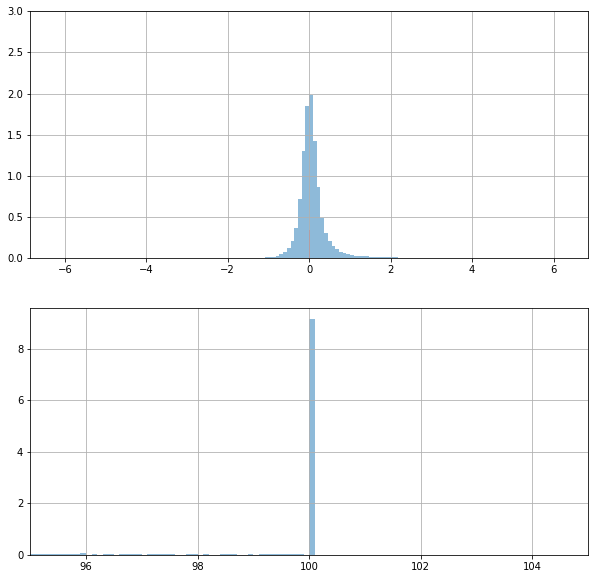

In [17]:
std = np.std(x)
print 'max:',np.max(x)
print 'min:',np.min(x)
print 'mean:',np.mean(x)
print 'std:', np.std(x)
plt.figure(figsize= (10,10))
plt.subplot(211)
plt.hist(x.reshape(7344720), bins = 100,alpha = 0.5, range = (-x.std()*2,x.std()*2),density = True)
plt.hist(x_test.reshape(7008087), bins = 100, alpha = 0.5,color = 'red', range = (-x_test.std()*2,x_test.std()*2),density = True)
plt.xlim([-x.std()*3,x.std()*3])
plt.ylim([0,3])
plt.grid(True)
plt.subplot(212)
plt.hist(x.reshape(7344720), bins = 100,alpha = 0.5, range = (95,105),density = True)
plt.grid(True)
plt.xlim([95,105])
plt.show()

In [18]:
print 'max test:',np.max(x_test)
print 'max:',np.max(x)

print '\nmin test:',np.min(x_test)
print 'min:',np.min(x)

print '\nmean test:',np.mean(x_test)
print 'mean:',np.mean(x)

print '\nstd test:', np.std(x_test)
print 'std:', np.std(x)

max test: 1.50280930136
max: 100.0

min test: -0.00139903619264
min: -10.5758395097

mean test: 0.00023700166187
mean: 0.23012201072

std test: 0.00550467151446
std: 2.28338524525


In [19]:
x_mask = copy.copy(x)

In [20]:
x[mask] = 0
if np.all(x_mask == x):
    print 'x[mask] does nothing'
else:
    print 'x[mask] does something'

x[mask] does nothing


In [23]:
print 'max test:',np.max(x_test)
print 'max:',np.max(x)
print 'max test_trim:',np.max(x_test_trim)

print '\nmin test:',np.min(x_test)
print 'min:',np.min(x)
print 'min test_trim:',np.min(x_test_trim)

print '\nmean test:',np.mean(x_test)
print 'mean:',np.mean(x)
print 'mean test_trim:',np.mean(x_test_trim)

print '\nstd test:',np.std(x_test)
print 'std:',np.std(x)
print 'std test_trim: ', np.std(x_test_trim)

max test: 1.50280930136
max: 100.0
max test_trim: 1.13002645969

min test: -0.00139903619264
min: -10.5758395097
min test_trim: -0.0957373976707

mean test: 0.00023700166187
mean: 0.23012201072
mean test_trim: 0.00558800022289

std test: 0.00550467151446
std: 2.28338524525
std test_trim:  0.0408960867135


In [24]:
x_test*=100

In [26]:
x_test_trim *= 100

In [27]:
print 'max test:',np.max(x_test)
print 'max:',np.max(x)
print 'max test_trim:',np.max(x_test_trim)

print '\nmin test:',np.min(x_test)
print 'min:',np.min(x)
print 'min test_trim:',np.min(x_test_trim)

print '\nmean test:',np.mean(x_test)
print 'mean:',np.mean(x)
print 'mean test_trim:',np.mean(x_test_trim)

print '\nstd test:',np.std(x_test)
print 'std:',np.std(x)
print 'std test_trim: ', np.std(x_test_trim)

max test: 150.280930136
max: 100.0
max test_trim: 113.002645969

min test: -0.139903619264
min: -10.5758395097
min test_trim: -9.57373976707

mean test: 0.023700166187
mean: 0.23012201072
mean test_trim: 0.558800022289

std test: 0.550467151446
std: 2.28338524525
std test_trim:  4.08960867135


max test: 150.280930136
max: 100.0
max test_trim: 56.5013229847

min test: -0.139903619264
min: -10.5758395097
min test_trim: -4.78686988354

mean test: 0.023700166187
mean: 0.23012201072
mean test_trim: 0.279400011145

std test: 0.550467151446
std: 2.28338524525
std test_trim:  2.04480433567


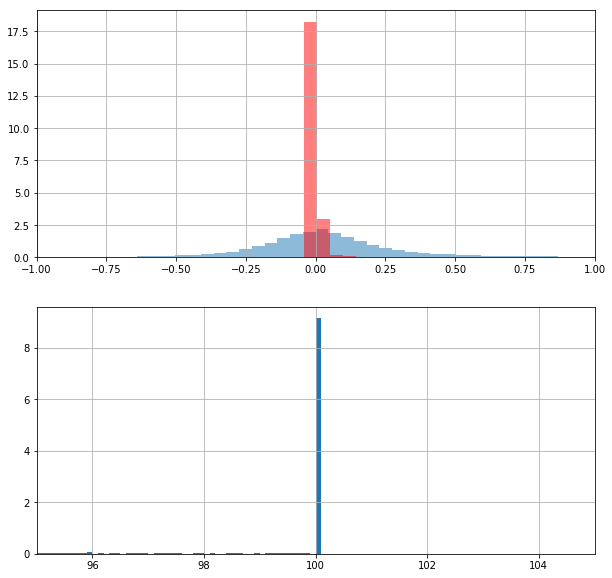

In [39]:
std = np.std(x)
print 'max test:',np.max(x_test)
print 'max:',np.max(x)
print 'max test_trim:',np.max(x_test_trim/2)

print '\nmin test:',np.min(x_test)
print 'min:',np.min(x)
print 'min test_trim:',np.min(x_test_trim/2)

print '\nmean test:',np.mean(x_test)
print 'mean:',np.mean(x)
print 'mean test_trim:',np.mean(x_test_trim/2)

print '\nstd test:',np.std(x_test)
print 'std:',np.std(x)
print 'std test_trim: ', np.std(x_test_trim/2)
plt.figure(figsize= (10,10))
plt.subplot(211)
plt.hist(x.reshape(7344720), bins = 100,alpha = 0.5, density = True, range = (-std,std))
plt.hist(x_test.ravel()/2, bins = 100, alpha = 0.5,color = 'red', density = True, range = (-np.std(x_test),np.std(x_test_trim)))
plt.xlim([-1,1])
plt.grid(True)
plt.subplot(212)
plt.hist(x.reshape(7344720), bins = 100,alpha = 1, density = True, range = (95,105))
plt.grid(True)
plt.xlim([95,105])
plt.show()

# PRE-PROCESSING FOR TESTING SET (X_TEST):

In [102]:
vmin_test = -1
vmax_test = 1

x_max = np.max(x_test)

scale_test = 100/x_test.max()

# mask_test = np.where(x_test >= 100)

# x_test[mask_test] = 0

x_test = (np.clip(x_test, vmin_test, vmax_test))*scale_test

# x_test[mask_test] = 0

# import scipy
# x_test = scipy.ndimage.filters.gaussian_filter(x_test, sigma = 2.28338524525, order = 0)

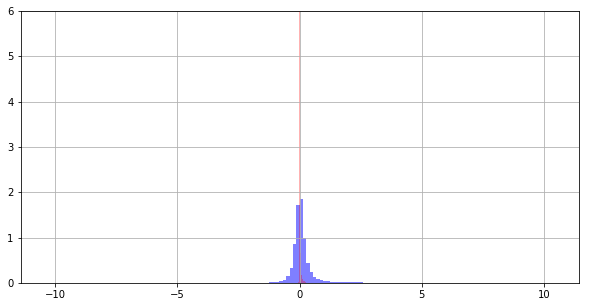

max test: 1.86249791395
max: 100.0

min test: -0.0930947254166
min: -10.5758395097

mean test: 0.00917965158305
mean: 0.23012201072

std test: 0.0899171204459
std: 2.28338524525


In [111]:
std = np.std(x)
plt.figure(figsize= (10,5))
plt.hist(x.reshape(7344720,), bins = 100,alpha =0.5, color = 'blue', density = True, range = (-x.std()*3,x.std()*3))
plt.hist(x_test.reshape(7008087,), bins = 100,alpha = 0.3, color = 'red', density = True, range = (-x_test.std()*3,x_test.std()*3))
plt.xlim([-std*5,std*5])
plt.ylim([0,6])
plt.grid(True)
plt.show()
print 'max test:',np.max(x_test)
print 'max:',np.max(x)

print '\nmin test:',np.min(x_test)
print 'min:',np.min(x)

print '\nmean test:',np.mean(x_test)
print 'mean:',np.mean(x)

print '\nstd test:',np.std(x_test)
print 'std:',np.std(x)